In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import glob
%pylab inline
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
import json
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/jclauss24/MTLSA_Project/refs/heads/main/Data/processed_data_4day.csv")

In [4]:
column_name = "IndexValue_NDXT"
N_test = 20
p = 5
i = 0
q = 5

arma_model = sm.tsa.ARIMA(data.iloc[:-N_test][column_name], order=(p, i, q))
model_fit = arma_model.fit()
model_fit.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        IndexValue_NDXT   No. Observations:                  893
Model:                 ARIMA(5, 0, 5)   Log Likelihood               -5609.120
Date:                Wed, 14 May 2025   AIC                          11242.240
Time:                        15:17:39   BIC                          11299.775
Sample:                             0   HQIC                         11264.227
                                - 893                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5718.5627      0.920   6216.023      0.000    5716.760    5720.366
ar.L1          1.2185      0.116     10.529      0.000       0.992       1.445
ar.L2         -0.4012      0.117     -3.444      0.001      -0.630      -0.173
ar.L3         -0.2492      0.128     -1.943      0.052      -0.501       0.002
ar.L4          1.0472      0.135      7.748      0.000       0.782       1.312
ar.L5         -0.6153      0.117     -5.253      0.000      -0.845      -0.386
ma.L1          0.0563      0.113      0.500      0.617      -0.164       0.277
ma.L2          0.1015      0.101      1.004      0.316      -0.097       0.300
ma.L3          0.4252      0.095      4.471      0.000       0.239       0.612
ma.L4         -0.5177      0.118     -4.382      0.000      -0.749      -0.286
ma.L5         -0.2708      0.036     -7.604      0.000      -0.341      -0.201
sigma2      1.693e+04    537.697     31.489      0.000    1.59e+04     1.8e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               575.36
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):              19.00   Skew:                            -0.65
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.35e+18. Standard errors may be unstable.
"""

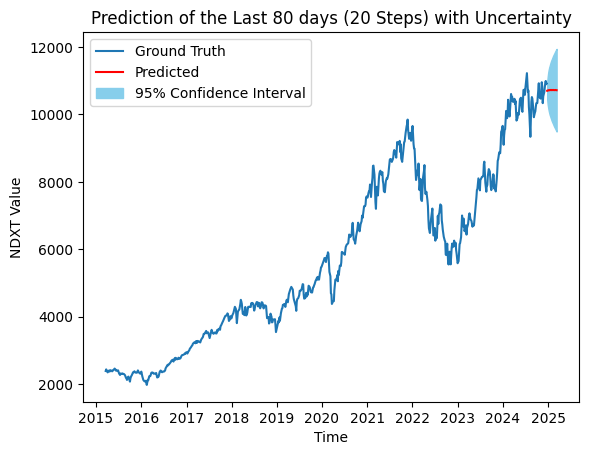

In [5]:
#plt.plot(data.iloc[:-N_test].index, data.iloc[:-N_test][column_name])#, rot=75, lw=2)

forecast = model_fit.get_forecast(N_test)
yhat = forecast.predicted_mean
yhat_conf_int = forecast.conf_int(alpha=0.05)

tVals = data.loc[1:, "Date"]#np.arange(0, len(data['CPI']), 1)
tVals.reset_index(drop=True, inplace=True)
tVals = np.array(tVals)

tVals_d= pd.to_datetime(tVals)


plt.plot(tVals_d[:-N_test], data.iloc[:-N_test-1][column_name], label='Ground Truth')#, rot=75, lw=2)

# Plot the predictions with uncertainty
plt.plot(tVals_d[-N_test:], yhat, label="Predicted", color="red")
plt.fill_between(tVals_d[-N_test:],  yhat_conf_int["lower " + column_name],
                 yhat_conf_int["upper " + column_name],
                 color="skyblue",
                 label="95% Confidence Interval")
tVals_d= pd.to_datetime(tVals)

tVals_f = [d.strftime('%Y-%m') for d in tVals_d]
#plt.plot(tVals[:-N_test], data.iloc[:-N_test-1][column_name])#, rot=75, lw=2)
#plt.xticks(tVals_f[::91], rotation=75)
plt.xlabel("Time")
plt.ylabel("NDXT Value")
plt.title("Prediction of the Last 80 days (20 Steps) with Uncertainty")
plt.legend(fontsize=10)
plt.show()

In [7]:
data_20 = np.concatenate((np.array(data.iloc[:-20][column_name]), np.array(yhat)))

dat = {'Date': data['Date'], 'last_20_pred':data_20}

predicted_data= pd.DataFrame(dat)

predicted_data.to_csv('predicted_data.csv')

In [9]:
MSE = mean_squared_error(data.iloc[-20:][column_name],np.array(yhat))

print('Mean Squared Error of prediction: ', MSE)

MeanSqured 

Mean Squared Error of prediction:  202776.11976524015


### Predicting into the future

In [90]:
column_name = "IndexValue_NDXT"
N_test = 20
p = 5
i = 0
q = 5

arma_model = sm.tsa.ARIMA(data[column_name], order=(p, i, q))
model_fit = arma_model.fit()
model_fit.summary()

forecast = model_fit.get_forecast(N_test)
yhat_15 = forecast.predicted_mean
yhat_conf_int_15 = forecast.conf_int(alpha=0.05)

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


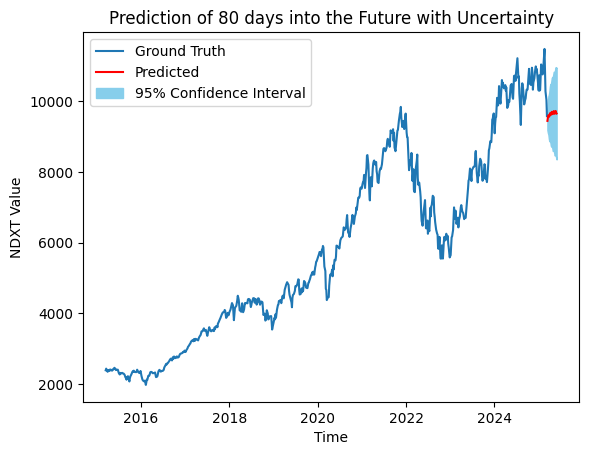

In [96]:

plt.plot(date_rng[:-N_test], data[column_name], label='Ground Truth')#, rot=75, lw=2)

#plt.plot(date_rng[:-N_test], data.iloc[:-N_test][column_name])#, rot=75, lw=2)


date_rng = pd.date_range(start=data['Date'].min(), end=('2025-05-31'), freq='4D')
#tVals = data.loc[1:, "Date"]#np.arange(0, len(data['CPI']), 1)
#tVals.reset_index(drop=True, inplace=True)
#tVals = np.array(tVals)

#tVals_d= pd.to_datetime(tVals)

# Plot the predictions with uncertainty
plt.plot(date_rng[-N_test:], yhat_15, label="Predicted", color="red")
plt.fill_between(date_rng[-N_test:],  yhat_conf_int_15["lower " + column_name],
                 yhat_conf_int_15["upper " + column_name],
                 color="skyblue",
                 label="95% Confidence Interval")
#plt.xticks(data['Date'].iloc[::90], rotation=75)
plt.xlabel("Time")
plt.ylabel("NDXT Value")
plt.title("Prediction of 80 days into the Future with Uncertainty")
plt.legend(fontsize=10)
plt.show()

#yhat is the prediction. 
#find the mean squared error

In [38]:
data_20 = np.concatenate((np.array(data[column_name]), np.array(yhat_15)))

date_rng = pd.date_range(start=data['Date'].min(), end=('2025-05-31'), freq='4D')

dat = {'Date': date_rng, '20_pred':data_15}

predicted_data_ahead= pd.DataFrame(dat)

predicted_data_ahead.to_csv('predicted_data_ahead.csv')